<a href="https://colab.research.google.com/github/madhav7034/Notes-2/blob/main/Sep22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Data Pre-processing, Handling Missing Values & Outlier Detection

Pre-processing
->  Refers to the transformation applied to our data before feeding it to the algorithm
-> Technique used to convert the raw data into a clean data set
-> Data gathered from diff sources is collected in raw format which is not feasible for analysis
-> Data mining technique used to transform the raw data in a useful and efficient format
-> Pre processing refers to performing series of operations to transform or change data

Need for data pre processing

-> For achieving better results from the applied model
-> Data set should be formatted in such a way that more than one ML and Deep algo are executed in one dataset
-> Increases accuracy and efficiency

Steps Involved in Data Pre-processing

-> Data Cleaning
      Missing values
      Noisy data
-> Data Transformation
      Normalization
      Attribute selection
-> Data Reduction
      Dimensionality reduction

MEAN AND MEDIAN IMPUTATION
    ->  If the varaible is normally distributed the mean and median are approximately the same
    ->  IF the variable is skewed the mean is biased by the values at the far end of the distribution,
        therefore the median is a better representaion of the majority of the values in the variable

"""

'\nData Pre-processing, Handling Missing Values & Outlier Detection\n\nPre-processing\n->  Refers to the transformation applied to our data before feeding it to the algorithm\n-> Technique used to convert the raw data into a clean data set\n-> Data gathered from diff sources is collected in raw format which is not feasible for analysis\n-> Data mining technique used to transform the raw data in a useful and efficient format\n-> Pre processing refers to performing series of operations to transform or change data\n\nNeed for data pre processing\n\n-> For achieving better results from the applied model\n-> Data set should be formatted in such a way that more than one ML and Deep algo are executed in one dataset\n-> Increases accuracy and efficiency\n\nSteps Involved in Data Pre-processing\n\n-> Data Cleaning\n      Missing values\n      Noisy data\n-> Data Transformation\n      Normalization\n      Attribute selection\n-> Data Reduction\n      Dimensionality reduction\n\nMEAN AND MEDIAN I

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dict = {'First Score':[100,90,np.nan,95,np.nan],
        'Second Score':[30,45,56,np.nan,np.nan],
        'Third Score':[np.nan,40,80,90,np.nan],
        'Fourth Score':[np.nan,np.nan,np.nan,65,np.nan],
        'Fifth Score':[12,15,18,43,54]}
df = pd.DataFrame(dict)
df.head()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,90.0,65.0,43
4,NaN,NaN,NaN,NaN,54


In [ ]:
df.isna()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,False,False,True,True,False
1,False,False,False,True,False
2,True,False,False,True,False
3,False,True,False,False,False
4,True,True,True,True,False


In [ ]:
df.isna().sum()

,0
First Score,2
Second Score,2
Third Score,2
Fourth Score,4
Fifth Score,0


In [ ]:
df1 = df.copy()
df1.fillna(45)

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,45.0,45.0,12
1,90.0,45.0,40.0,45.0,15
2,45.0,56.0,80.0,45.0,18
3,95.0,45.0,90.0,65.0,43
4,45.0,45.0,45.0,45.0,54


In [ ]:

df1.ffill()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,90.0,56.0,80.0,NaN,18
3,95.0,56.0,90.0,65.0,43
4,95.0,56.0,90.0,65.0,54


In [ ]:
df1.bfill()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,40.0,65.0,12
1,90.0,45.0,40.0,65.0,15
2,95.0,56.0,80.0,65.0,18
3,95.0,NaN,90.0,65.0,43
4,NaN,NaN,NaN,NaN,54


In [ ]:
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,90.0,65.0,43
4,NaN,NaN,NaN,NaN,54


In [ ]:
repalce_vals = {'First Score':10.1,'Second Score':30.1}
df1.fillna(repalce_vals)

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,10.1,56.0,80.0,NaN,18
3,95.0,30.1,90.0,65.0,43
4,10.1,30.1,NaN,NaN,54


In [ ]:
df1.fillna(df1.mean())

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.000000,70.0,65.0,12
1,90.0,45.000000,40.0,65.0,15
2,95.0,56.000000,80.0,65.0,18
3,95.0,43.666667,90.0,65.0,43
4,95.0,43.666667,70.0,65.0,54


In [ ]:
df1.fillna(df1.median())

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,80.0,65.0,12
1,90.0,45.0,40.0,65.0,15
2,95.0,56.0,80.0,65.0,18
3,95.0,45.0,90.0,65.0,43
4,95.0,45.0,80.0,65.0,54


In [ ]:
df1['First Score'].fillna(df1['Fifth Score'])

,First Score
0,100.0
1,90.0
2,18.0
3,95.0
4,54.0


In [ ]:
(df1['First Score'].isna()) & (df1['Fifth Score']>20)

,0
0,False
1,False
2,False
3,False
4,True


In [ ]:
df1.loc[(df1['First Score'].isna()) & (df1['Fifth Score']>20)]

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
4,NaN,NaN,NaN,NaN,54


In [ ]:
df1.loc[(df1['First Score'].isna()) & (df1['Fifth Score']>20),'First Score']=250

In [ ]:
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,90.0,65.0,43
4,250.0,NaN,NaN,NaN,54


In [ ]:
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,90.0,65.0,43
4,250.0,NaN,NaN,NaN,54


In [ ]:
(df1['Second Score'].isna()) & (df1['Fifth Score']>20)

,0
0,False
1,False
2,False
3,True
4,True


In [ ]:
df1.loc[(df1['Second Score'].isna()) & (df1['Fifth Score']>20)]

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
3,95.0,NaN,90.0,65.0,43
4,250.0,NaN,NaN,NaN,54


In [ ]:
df1.loc[(df1['Second Score'].isna()) & (df1['Fifth Score']>20),'Second Score']=250,100

In [ ]:
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,250.0,90.0,65.0,43
4,250.0,100.0,NaN,NaN,54


In [ ]:
df1.loc[(df1['First Score'].isna()) & (df1['Fifth Score']>15),'First Score']=100

In [ ]:
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,100.0,56.0,80.0,NaN,18
3,95.0,250.0,90.0,65.0,43
4,250.0,100.0,NaN,NaN,54


In [ ]:
df1.loc[(df1['Third Score'].isna()) & (df1['Fifth Score']>50),'Third Score']=90

In [ ]:
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,100.0,56.0,80.0,NaN,18
3,95.0,250.0,90.0,65.0,43
4,250.0,100.0,90.0,NaN,54


In [ ]:
hr = pd.read_csv('/content/hr_employees.csv')

In [ ]:
hr

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,NaN,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,NaN,HR,45000.0,2.0,Bachelors


In [ ]:
(hr['Age'].isna()) & (hr['Education']=='Bachelors')

,0
0,False
1,False
2,False
3,False
4,True


In [ ]:
hr.loc[(hr['Age'].isna()) & (hr['Education']=='Bachelors'),'Age']=28

In [ ]:
hr

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,NaN,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,28.0,HR,45000.0,2.0,Bachelors


In [ ]:
hr.loc[(hr['Age'].isna()) & (hr['Education']=='Masters'),'Age']=31

In [ ]:
hr

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,31.0,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,28.0,HR,45000.0,2.0,Bachelors


In [ ]:
hr.loc[(hr['Salary'].isna()) & (hr['Age']==35),'Salary']=41000

In [ ]:
hr

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,31.0,HR,42000.0,3.0,Masters
2,103,35.0,Finance,41000.0,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,28.0,HR,45000.0,2.0,Bachelors


In [ ]:
beer = pd.read_csv('/content/beer-servings.csv')

In [ ]:
beer

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
num_cols = beer.select_dtypes(include='float64')
num_cols

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9
...,...,...,...,...
188,NaN,100.0,3.0,7.7
189,111.0,2.0,1.0,2.0
190,6.0,0.0,0.0,0.1
191,32.0,19.0,4.0,2.5


array([[<Axes: title={'center': 'beer_servings'}>,
        <Axes: title={'center': 'spirit_servings'}>],
       [<Axes: title={'center': 'wine_servings'}>,
        <Axes: title={'center': 'total_litres_of_pure_alcohol'}>]],
      dtype=object)

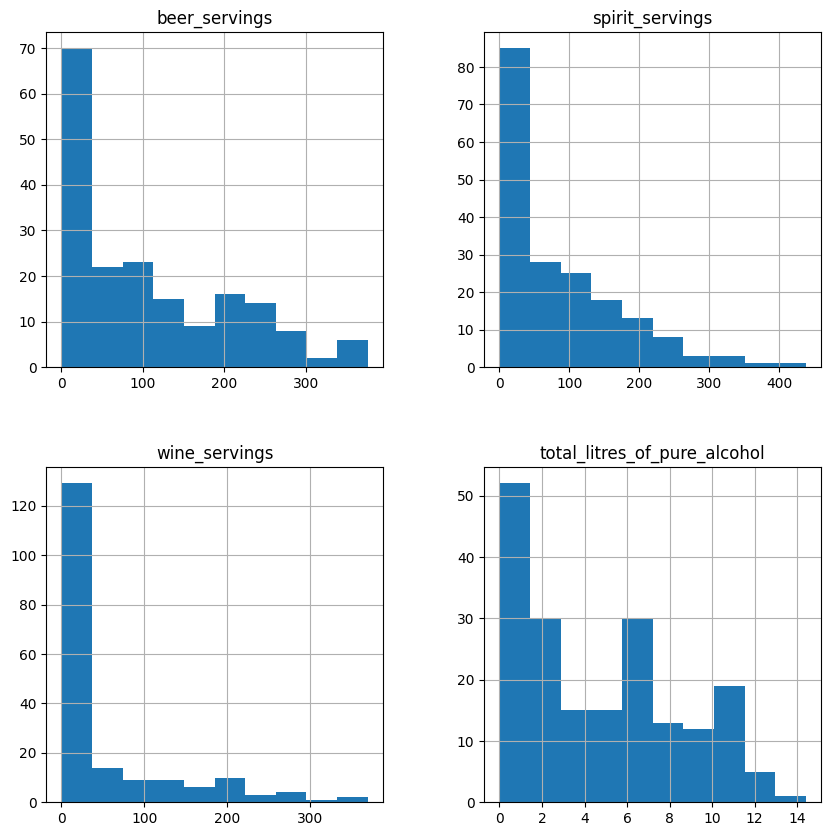

In [ ]:
num_cols.hist(figsize=(10,10))

In [ ]:
beer.fillna({'beer_servings':beer['beer_servings'].median()},inplace=True)

In [ ]:
beer

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
beer.fillna({'spirit_servings':beer['spirit_servings'].median()},inplace=True)

In [ ]:
beer.fillna({'wine_servings':beer['wine_servings'].median()},inplace=True)

In [ ]:
beer.fillna({'total_litres_of_pure_alcohol':beer['total_litres_of_pure_alcohol'].median()},inplace=True)

In [ ]:
beer.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


In [ ]:
"""
Outliers
    Badly affect mean and standard deviation of the dataset
    ML algo do not work well in the presence of outlier, so it is desirable to detect and remove outliers
"""

'\nOutliers\n    Badly affect mean and standard deviation of the dataset\n    ML algo do not work well in the presence of outlier, so it is desirable to detect and remove outliers\n'

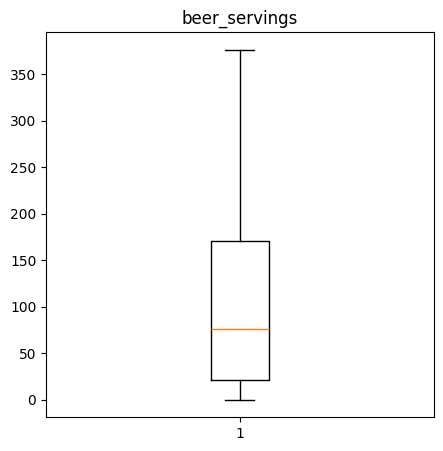

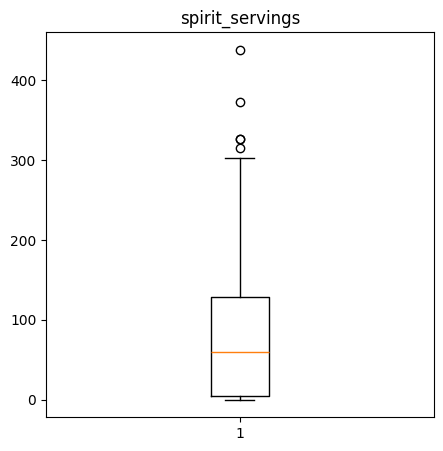

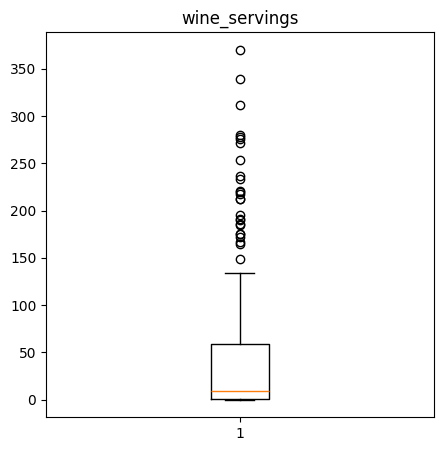

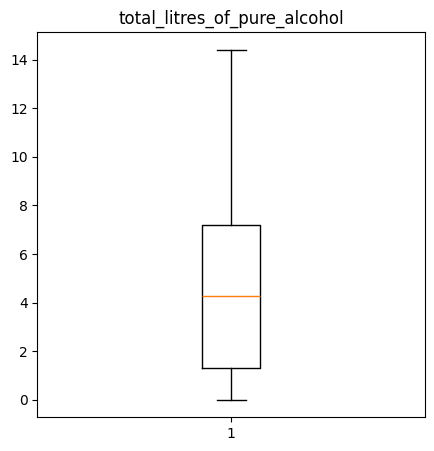

In [ ]:
for i in num_cols:
  plt.figure(figsize=(5,5))
  plt.boxplot(beer[i])
  plt.title(i)

In [ ]:
q1 =np.quantile(beer['spirit_servings'],0.25)
q3 =np.quantile(beer['spirit_servings'],0.75)
iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)
print(iqr)

312.5
-179.5
123.0


In [ ]:
spirit_outliers =[]
for i in beer['spirit_servings']:
  if i > upper_bound or i < lower_bound:
    spirit_outliers.append(i)

In [ ]:
spirit_outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

In [ ]:
beer['spirit_servings'] = beer['spirit_servings'].clip(lower=lower_bound,upper=upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x79942dbad370>,
 'caps': [<matplotlib.lines.Line2D at 0x79942dbad940>,
 'boxes': [<matplotlib.lines.Line2D at 0x79942dbad0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79942dbadee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79942dbae1e0>],
 'means': []}

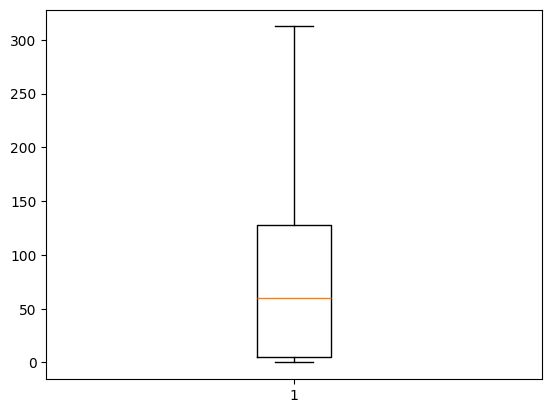

In [ ]:
plt.boxplot(beer['spirit_servings'])

In [ ]:
q1 =np.quantile(beer['wine_servings'],0.25)
q3 =np.quantile(beer['wine_servings'],0.75)
iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)
print(iqr)

146.0
-86.0
58.0


In [ ]:
wine_outliers =[]
for i in beer['wine_servings']:
  if i > upper_bound or i < lower_bound:
    wine_outliers.append(i)

In [ ]:
wine_outliers

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [ ]:
beer['wine_servings'] = beer['wine_servings'].clip(lower=lower_bound,upper=upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x79942da0cda0>,
 'caps': [<matplotlib.lines.Line2D at 0x79942da0d2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79942da0cb00>],
 'medians': [<matplotlib.lines.Line2D at 0x79942da0d7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79942da0da90>],
 'means': []}

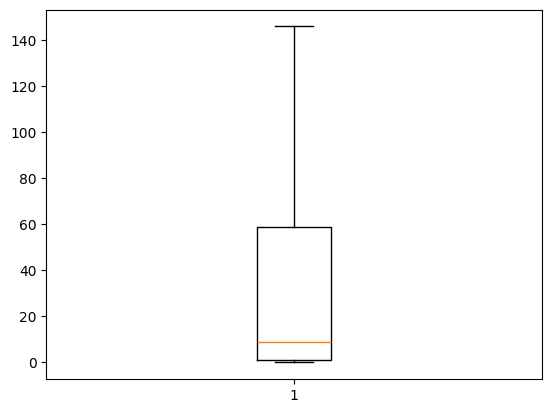

In [ ]:
plt.boxplot(beer['wine_servings'])

In [ ]:
import seaborn as sns

In [ ]:
tit = sns.load_dataset('titanic')


In [ ]:
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
tit.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tit.drop('deck',axis=1,inplace=True)

In [ ]:
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
tit.fillna({'age':tit['age'].median()},inplace=True)

In [ ]:
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
tit.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
tit['embarked']=tit['embarked'].ffill()

In [ ]:
tit['embark_town']=tit['embark_town'].ffill()

In [ ]:
tit.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
tit = tit.drop(['alive','class','alone','embarked','adult_male'],axis=1)

In [ ]:
num_col = tit.select_dtypes(include='float64')
num_col

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


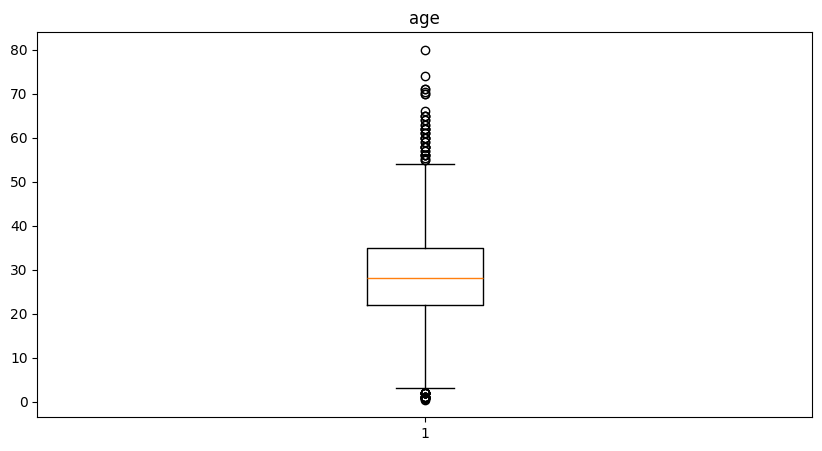

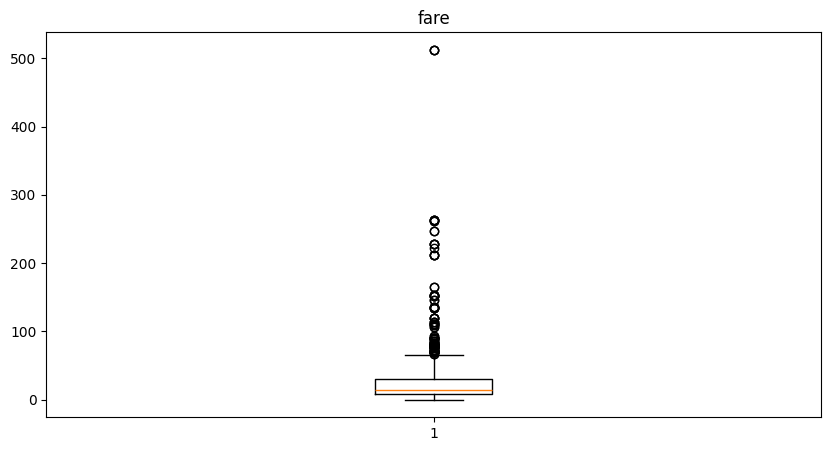

In [ ]:
for i in num_col:
    plt.figure(figsize=(10,5))
    plt.boxplot(tit[i])
    plt.title(i)

In [ ]:
q1 = np.quantile(tit['age'],0.25)
q3 = np.quantile(tit['age'],0.75)

iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print(upper_bound)
print(lower_bound)
print(iqr)

54.5
2.5
13.0


In [ ]:
age_out = []
for i in tit['age']:
  if i > upper_bound or i < lower_bound:
    age_out.append(i)

In [ ]:
age_out

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [ ]:
tit['age']=tit['age'].clip(lower=lower_bound,upper=upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x7994235f4860>,
 'caps': [<matplotlib.lines.Line2D at 0x7994235f5af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7994235f45f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7994235f6060>],
 'fliers': [<matplotlib.lines.Line2D at 0x7994235f6300>],
 'means': []}

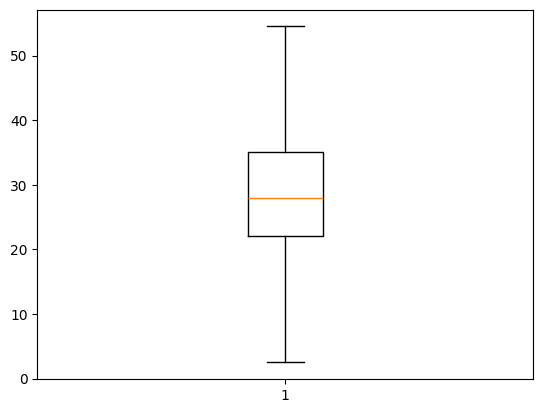

In [ ]:
plt.boxplot(tit['age'])

In [ ]:
q1 = np.quantile(tit['fare'],0.25)
q3 = np.quantile(tit['fare'],0.75)

iqr = q3 - q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print(upper_bound)
print(lower_bound)
print(iqr)

65.6344
-26.724
23.0896


In [ ]:
fare_out = []
for i in tit['fare']:
  if i > upper_bound or i < lower_bound:
    fare_out.append(i)

In [ ]:
fare_out

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [ ]:
tit['fare']=tit['fare'].clip(lower=lower_bound,upper=upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x79944a2d6d20>,
 'caps': [<matplotlib.lines.Line2D at 0x79942352e060>,
 'boxes': [<matplotlib.lines.Line2D at 0x79942352d940>],
 'medians': [<matplotlib.lines.Line2D at 0x79942352e690>],
 'fliers': [<matplotlib.lines.Line2D at 0x79942352e9c0>],
 'means': []}

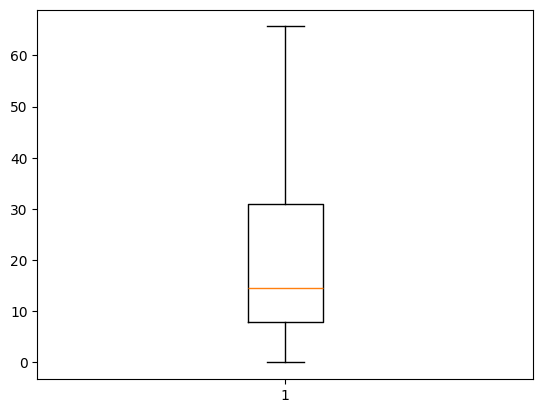

In [ ]:
plt.boxplot(tit['fare'])

In [ ]:
tit.to_csv('tita_clean.csv')